# Zfp711 Facs Results

In [1]:
# Load necessary libraries
suppressPackageStartupMessages({
library(ggplot2)
library(dplyr)
library(reshape2)
library(lme4)
library(lmerTest)
library(tidyr)
library(ggsignif)
})

In [2]:
load(file = '../step8_Flow_Cytometry/results/Zfp711/rdata.rdata')

In [3]:
ls()

[1] "annotations_df"              "data"                       
 [3] "data_hr"                     "data_melted_mixed"          
 [5] "data_Zfp711_control"         "data_Zfp711_control_hr"     
 [7] "data0"                       "data1"                      
 [9] "data2"                       "human_readable_names"       
[11] "humanreadble"                "measurement"                
[13] "measurement_cols"            "mixed_effects_results"      
[15] "mixed_effects_results_mixed" "plot"                       
[17] "r3dcol"                      "replace_with_human_readable"
[19] "result"                      "run_mixed_effects"          
[21] "significance_threshold"      "significant_mixed_effects"  
[23] "singular_fit_measurements"

In [5]:
head(data_melted_mixed)

,Measurement_hr,Samples0,Samples1,Samples2,Samples3,Conditions,DifferentiationA,DifferentiationB,DifferentiationC,Value,⋯,Overall_Mean,SD,Median,IQR,AIC,BIC,Effect_Size,CI_Lower,CI_Upper,Significance
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,CD41+,Zfp711_zG8,Zfp711 c1,Zfp711 KO Clone 1,Zfp711 KO c1,Zfp711 KO,Differentiation 1,diff. 1,Diff. 1,12.6,⋯,14.33655,8.656201,12.6,11.09,180.8252,186.2943,2.245245,3.615402,6.253651,n.s.
2,CD41+,Zfp711_zD9,Zfp711 c2,Zfp711 KO Clone 2,Zfp711 KO c2,Zfp711 KO,Differentiation 1,diff. 1,Diff. 1,12.6,⋯,14.33655,8.656201,12.6,11.09,180.8252,186.2943,2.245245,3.615402,6.253651,n.s.
3,CD41+,Zfp711_zD10,Zfp711 c3,Zfp711 KO Clone 3,Zfp711 KO c3,Zfp711 KO,Differentiation 1,diff. 1,Diff. 1,11.8,⋯,14.33655,8.656201,12.6,11.09,180.8252,186.2943,2.245245,3.615402,6.253651,n.s.
4,CD41+,Zfp711_zB12,Zfp711 c4,Zfp711 KO Clone 4,Zfp711 KO c4,Zfp711 KO,Differentiation 1,diff. 1,Diff. 1,18.5,⋯,14.33655,8.656201,12.6,11.09,180.8252,186.2943,2.245245,3.615402,6.253651,n.s.
5,CD41+,NT_ntZA5,NT c1,NT WT Clone 1,NT WT c1,NT WT,Differentiation 1,diff. 1,Diff. 1,NA,⋯,14.33655,8.656201,12.6,11.09,180.8252,186.2943,2.245245,3.615402,6.253651,n.s.
6,CD41+,NT_ntZA3,NT c2,NT WT Clone 2,NT WT c2,NT WT,Differentiation 1,diff. 1,Diff. 1,10.9,⋯,14.33655,8.656201,12.6,11.09,180.8252,186.2943,2.245245,3.615402,6.253651,n.s.


In [7]:
# Make sure Conditions is a factor and levels are correct:
data_melted_mixed$Conditions <- factor(data_melted_mixed$Conditions)

# Calculate y position above both boxes (use max value for either condition)
annotations_df <- data_melted_mixed %>%
  group_by(Measurement_hr) %>%
  summarize(
    y_position = max(Value, na.rm = TRUE) * 1.14,
    Significance = first(Significance),    # Replace with your p-value/asterisk
    .groups = "drop"
  )

# Get numeric positions for the two conditions
cond_levels <- levels(data_melted_mixed$Conditions)
x1 <- cond_levels[1]
x2 <- cond_levels[2]


In [8]:
library(dplyr)

annotations_df <- data_melted_mixed %>%
  group_by(Measurement_hr) %>%
  summarize(
    y_position = max(Value, na.rm = TRUE) + 10,
    Significance = first(Significance),    # Replace with your actual test result if needed
    .groups = "drop"
  ) %>%
  mutate(size = ifelse(Significance %in% c("n.s.", "ns", "NS", "N.S."), 3.5, 6))  # Adjust sizes as you like


In [9]:
annotations_df

Measurement_hr,y_position,Significance,size
<fct>,<dbl>,<fct>,<dbl>
Flk1+ Pdgfra+,53.00,n.s.,3.5
Flk1+ Pdgfra-,53.00,n.s.,3.5
Flk1- Pdgfra+ (Day4),32.90,n.s.,3.5
Flk1- Pdgfra-,60.30,n.s.,3.5
Flk1+ (I),87.60,n.s.,3.5
Pdgfra+,60.60,n.s.,3.5
Flk1+ Tek+,30.40,n.s.,3.5
Flk1+ Tek-,67.70,*,6.0
Flk1- Tek+,29.90,n.s.,3.5


In [11]:
library(dplyr)

data_plot <- data_melted_mixed %>%
  filter(!Measurement_hr %in% c())


In [12]:
annotations_df <- data_plot %>%
  group_by(Measurement_hr) %>%
  summarize(
    y_position = (max(Value, na.rm = TRUE) * 1.04)+2,
    Significance = first(Significance),
    .groups = "drop"
  ) %>%
  mutate(size = ifelse(Significance %in% c("n.s.", "ns", "NS", "N.S."), 3.5, 6))

In [13]:
# Drop unused levels after filtering
data_plot <- data_plot %>% mutate(Measurement_hr = droplevels(factor(Measurement_hr)))
annotations_df <- annotations_df %>% mutate(Measurement_hr = factor(Measurement_hr, levels = levels(data_plot$Measurement_hr)))


In [14]:
custom_order <- c(
  "Flk1+ (I)", "Pdgfra+", "Flk1+ Pdgfra-", "Flk1+ Pdgfra+", "Flk1- Pdgfra+ (Day4)",
  "Flk1+ Tek+", "Flk1+ Tek+ (I)", "Tek+",
  "Pdgfra+ (Day7)", "Pdgfrb+", "Pdgfra+ Pdgfrab+ (I)", "Pdgfra+ Pdgfrab+ (II)", "Pdgfra+ Pdgfrab+ (III)",
  "CD41+", "CD41+ (I)", "CD41+ (II)", "CD71+", "CD41+ CD71+ (L)",
  "CD45+", "CD45+ (I)", "CD45+ (II)",
  "CD93+",
  "Icam2+", "Cdh5+", "Icam2+ Cdh5+"
)


In [15]:
data_plot_ordered <- data_plot %>%
  filter(Measurement_hr %in% custom_order) %>%
  mutate(Measurement_hr = factor(Measurement_hr, levels = custom_order))


In [16]:
annotations_df <- data_plot_ordered %>%
  group_by(Measurement_hr) %>%
  summarize(
    y_position = (max(Value, na.rm = TRUE) * 1)+1,
    Significance = first(Significance),
    .groups = "drop"
  ) %>%
  mutate(size = ifelse(Significance %in% c("n.s.", "ns", "NS", "N.S."), 4, 9))

Warning message:
“A numeric `legend.position` argument in `theme()` was deprecated in ggplot2
3.5.0.
ℹ Please use the `legend.position.inside` argument of `theme()` instead.”
Warning message:
“Removed 23 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


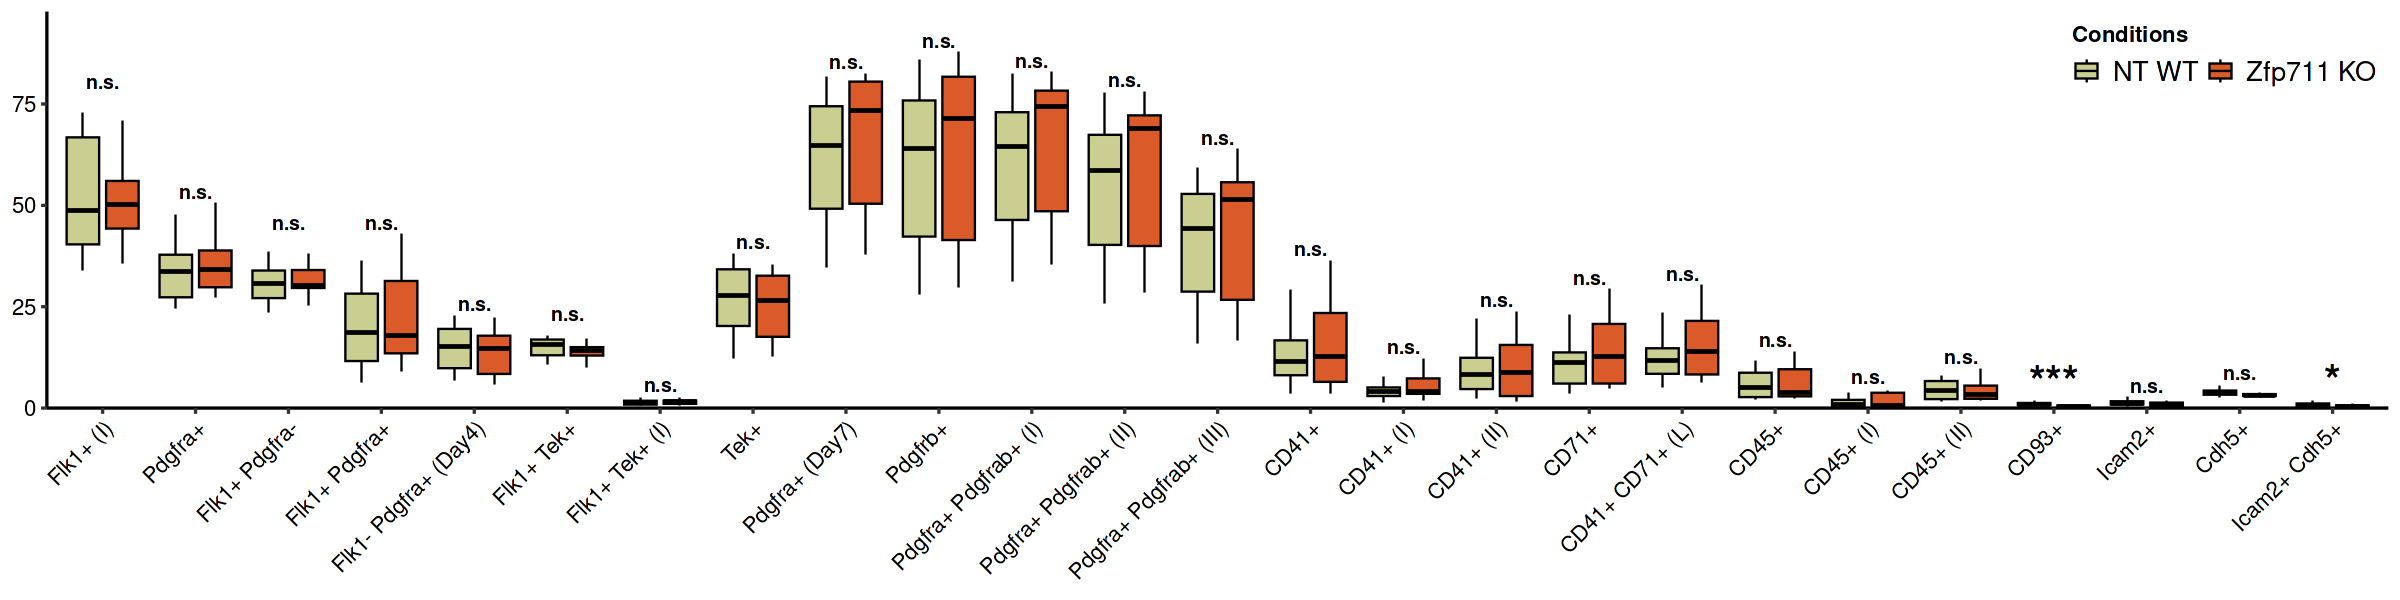

In [17]:
options(repr.plot.width = 20, repr.plot.height = 5)
ggplot(data_plot_ordered, aes(x = Measurement_hr, y = Value, fill = Conditions)) +
  geom_boxplot(
    position = position_dodge(width = 0.85),
    outlier.shape = NA,
    alpha = 1,
    width = 0.7,
    color = "black"
  ) +
  geom_text(
    data = annotations_df,
    aes(
      x = Measurement_hr,
      y = y_position * 1.0,
      label = Significance,
      size = size
    ),
    vjust = 0,
    fontface = "bold",
    inherit.aes = FALSE
  ) +
  scale_size_identity() +
  scale_fill_manual(
    values = c(
      "Zfp711 KO" = "#DA5A2A",
      "NT WT" = "#CBCE91"
    )
  ) +
  scale_y_continuous(expand = expansion(mult = c(0, 0.10))) +
  labs(
    title = NULL,
    y = NULL,
    x = NULL
  ) +
  theme_classic(base_size = 14) +
  theme(
    axis.line = element_line(size = 0.7),
    axis.ticks = element_line(size = 0.7),
    axis.text.x = element_text(angle = 45, hjust = 1, size = 13, color = "black"),
    axis.text.y = element_text(size = 13, color = "black"),
    legend.position = c(1, 1),                    # Top right INSIDE
    legend.justification = c(1, 1),               # Anchor to top right
    legend.title = element_text(size = 13, face = "bold"),
    legend.text = element_text(size = 16),
    legend.background = element_rect(fill = alpha('white', 0.7)), # Optional: legend background for readability
    legend.box.margin = margin(6, 6, 6, 6)        # Optional: add margin
  ) +
  guides(
    fill = guide_legend(title = "Conditions", nrow = 1)
  )


In [18]:
ggsave(filename = './zfp711_facs_selected.pdf',plot = last_plot(),width = 20, height = 5,units = 'in',dpi = 300)

Warning message:
“Removed 23 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


In [19]:
ggsave(filename = './zfp711_facs_selected.png',plot = last_plot(),width = 20, height = 5,units = 'in',dpi = 300)

Warning message:
“Removed 23 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


In [20]:
ggsave(filename = './zfp711_facs_selected.svg',plot = last_plot(),width = 20, height = 5,units = 'in',dpi = 300)

Warning message:
“Removed 23 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


In [21]:
save.image(file = './new_plot_env_zfp711.RData', compress = FALSE)

In [22]:
sessionInfo()

R version 4.5.1 (2025-06-13)
Platform: x86_64-pc-linux-gnu
Running under: Debian GNU/Linux 12 (bookworm)

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas-pthread/libblas.so.3 
LAPACK: /usr/lib/x86_64-linux-gnu/openblas-pthread/libopenblasp-r0.3.21.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

time zone: Europe/Amsterdam
tzcode source: system (glibc)

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] ggsignif_0.6.4 tidyr_1.3.1    lmerTest_3.1-3 lme4_1.1-37    Matrix_1.7-3  
[6] reshape2_1.4.4 dplyr_1.1.4    ggplot2_3.5.2 

loaded via a namespace (and n